### Goal: exploration of the dataframe, understand the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [20]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [3]:
DATASET_BEERADVOCATE = 'DATA/BeerAdvocate/'
DATASET_MATCHEDBEER = 'DATA/matched_beer_data/'
DATASET_RATEBEER = 'DATA/RateBeer/'

In [4]:
df_adv_beer = pd.read_csv(DATASET_BEERADVOCATE + 'beers.csv')
df_adv_breweries = pd.read_csv(DATASET_BEERADVOCATE + 'breweries.csv')
df_adv_users = pd.read_csv(DATASET_BEERADVOCATE + 'users.csv')

print('shape of all datasets: \n',
     'beer',df_adv_beer.shape,'\n',
     'breweries',df_adv_breweries.shape,'\n',
     'users',df_adv_users.shape)

shape of all datasets: 
 beer (280823, 15) 
 breweries (16758, 4) 
 users (153704, 6)


## Exploration of the datasets 

In [5]:
df_adv_beer.sample(5)

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
226759,104475,Meyer May's Saison,30229,Grand Rapids Brewing Company,Saison / Farmhouse Ale,2,1,3.92,NaN,NaN,8.0,3.76,NaN,0,NaN
276080,58942,Test Batch#1: An Amercian Pale Ale,21841,Craggie Brewing Company,American Pale Ale (APA),1,1,3.80,NaN,NaN,4.2,3.80,NaN,0,NaN
761,21273,Good King Leglass,323,Harviestoun Brewery Ltd.,Extra Special / Strong Bitter (ESB),2,2,4.23,NaN,NaN,4.5,4.23,NaN,0,NaN
206305,237494,Mariana Trench - Rum Barrel Aged,27077,Due South Brewing Co.,American Double / Imperial Stout,4,0,4.23,NaN,NaN,9.8,4.23,NaN,0,NaN
265372,131531,Sour Tan,15237,De Struise Brouwers,Flanders Oud Bruin,2,0,3.75,NaN,NaN,5.0,3.75,-0.259806,0,NaN


In [6]:
df_adv_beer.dtypes.value_counts()

float64    7
int64      5
object     3
dtype: int64

<AxesSubplot:>

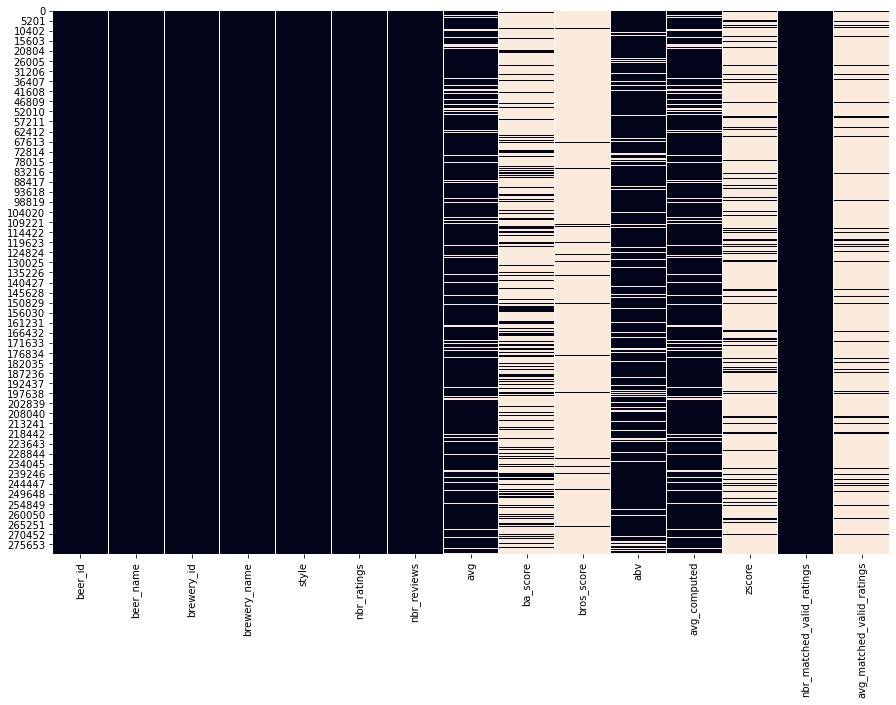

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(df_adv_beer.isna(), cbar=False)

In [8]:
(df_adv_beer.isna().sum()/df_adv_beer.shape[0]).sort_values(ascending=True)

beer_id                      0.000000
beer_name                    0.000000
brewery_id                   0.000000
brewery_name                 0.000000
style                        0.000000
nbr_ratings                  0.000000
nbr_reviews                  0.000000
nbr_matched_valid_ratings    0.000000
avg                          0.116903
avg_computed                 0.116946
abv                          0.128280
ba_score                     0.782069
zscore                       0.856547
avg_matched_valid_ratings    0.899324
bros_score                   0.979695
dtype: float64

In [9]:
df_adv_breweries.shape

(16758, 4)

In [10]:
df_adv_breweries.dtypes

id            int64
location     object
name         object
nbr_beers     int64
dtype: object

In [11]:
df_adv_breweries.isna().sum()/df_adv_breweries.shape[0]

id           0.0
location     0.0
name         0.0
nbr_beers    0.0
dtype: float64

In [12]:
df_adv_users.shape

(153704, 6)

In [13]:
df_adv_users.dtypes

nbr_ratings      int64
nbr_reviews      int64
user_id         object
user_name       object
joined         float64
location        object
dtype: object

In [14]:
df_adv_users.isna().sum()/df_adv_users.shape[0]

nbr_ratings    0.000000
nbr_reviews    0.000000
user_id        0.000000
user_name      0.000007
joined         0.017254
location       0.203502
dtype: float64

<AxesSubplot:>

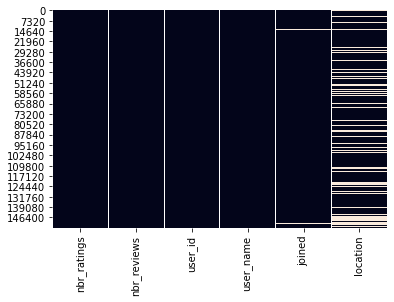

In [15]:
sns.heatmap(df_adv_users.isna(), cbar=False)

### Background Analysis

In [35]:
# Drop all columns with more than 78% of nan values

df_adv_beer = df_adv_beer[df_adv_beer.columns[df_adv_beer.isna().sum()/df_adv_beer.shape[0] < 0.78]]
df_adv_beer = df_adv_beer.drop('beer_id', axis=1)

In [36]:
df_adv_beer.head()

,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,abv,avg_computed,nbr_matched_valid_ratings
0,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,4.7,NaN,0
1,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,3.8,NaN,0
2,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,4.8,NaN,0
3,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,4.0,NaN,0
4,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,4.5,NaN,0


#### Continues variables

<Figure size 432x288 with 0 Axes>

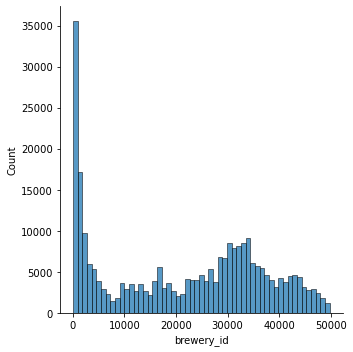

In [24]:
plt.figure()
sns.displot(df_adv_beer['brewery_id'])

<Figure size 432x288 with 0 Axes>

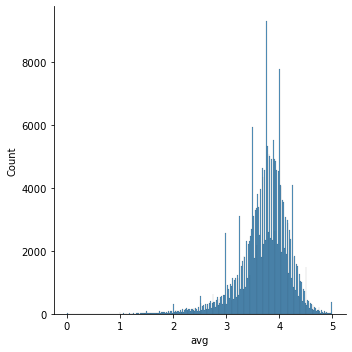

In [25]:
plt.figure()
sns.displot(df_adv_beer['avg'])

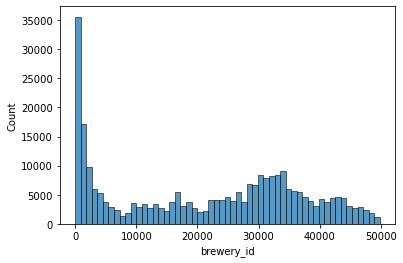

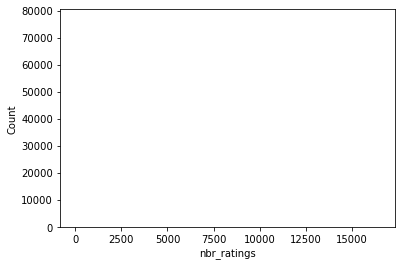

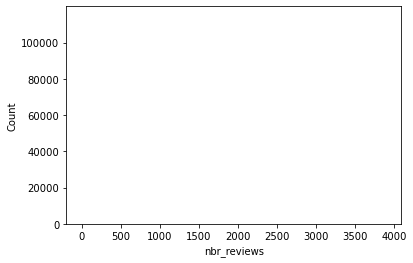

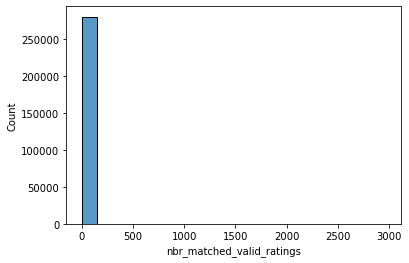

In [38]:
for col in df_adv_beer.select_dtypes('int64'):
    plt.figure()
    sns.histplot(df_adv_beer[col])

In [52]:
df_adv_beer['nbr_matched_valid_ratings'].value_counts()

0       252551
1        12117
2         4683
3         2485
4         1523
5         1027
6          765
7          608
8          485
9          360
10         325
11         286
12         250
13         214
14         169
17         160
16         152
15         149
18         121
19         111
20         100
22          91
23          89
21          79
24          77
26          61
28          60
27          58
29          55
34          54
25          54
33          47
30          46
31          44
36          42
35          33
44          32
37          32
32          32
39          31
41          30
38          23
56          23
47          23
40          22
42          22
54          21
48          21
46          20
59          20
64          19
50          17
49          17
45          17
53          16
52          16
43          16
67          16
57          14
65          14
60          13
58          13
72          12
70          12
63          11
55          11
86        

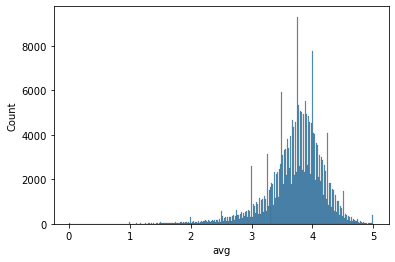

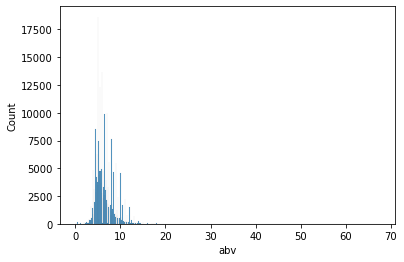

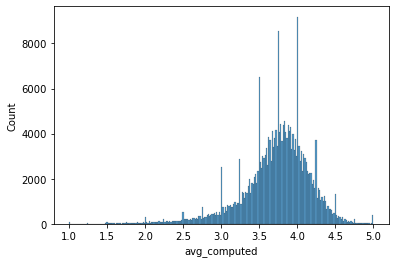

In [30]:
for col in df_adv_beer.select_dtypes('float'):
    plt.figure()
    sns.histplot(df_adv_beer[col])

In [27]:
df_adv_beer.dtypes

beer_id                        int64
beer_name                     object
brewery_id                     int64
brewery_name                  object
style                         object
nbr_ratings                    int64
nbr_reviews                    int64
avg                          float64
abv                          float64
avg_computed                 float64
nbr_matched_valid_ratings      int64
dtype: object

### Object variables

In [41]:
for col in df_adv_beer.select_dtypes('object'):
    print(f'{col:-<50} {df_adv_beer[col].unique()}')
    print('\n')

beer_name----------------------------------------- ['Nashe Moskovskoe' 'Nashe Pivovskoe' 'Nashe Shakhterskoe' ...
 "Witch's Hair Pumpkin Ale With Graham Crackers" 'Diamond Stout'
 'Irvington Pale Ale']


brewery_name-------------------------------------- ['Abdysh-Ata (Абдыш Ата)' 'Arpa (АРПА)' 'Bear Beer' ...
 'Alt Platz Brewing Company LLC' 'Twisted Manzanita Ales'
 'Summit Station Restaurant & Brewery']


style--------------------------------------------- ['Euro Pale Lager' 'American Pale Lager' 'Euro Dark Lager'
 'Foreign / Export Stout' 'Irish Red Ale' 'Czech Pilsener' 'Kölsch'
 'Dortmunder / Export Lager' 'Munich Dunkel Lager' 'Märzen / Oktoberfest'
 'English Pale Ale' 'English Bitter' 'American Pale Wheat Ale'
 'American Blonde Ale' 'English India Pale Ale (IPA)' 'Irish Dry Stout'
 'American Stout' 'American Pale Ale (APA)' 'Milk / Sweet Stout'
 'American Double / Imperial IPA' 'German Pilsener' 'American IPA'
 'Witbier' 'Munich Helles Lager' 'English Brown Ale' 'English Porter'


In [42]:
df_adv_beer['style'].nunique()

104